Проект:

https://www.kaggle.com/c/regression-tutors-expected-math-exam-results регрессия
https://www.kaggle.com/c/classification-choose-tutors классификация

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
train = pd.read_csv('~/Desktop/Proj/regression-tutors-expected-math-exam-results/train.csv')
test = pd.read_csv('~/Desktop/Proj/regression-tutors-expected-math-exam-results/test.csv')

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


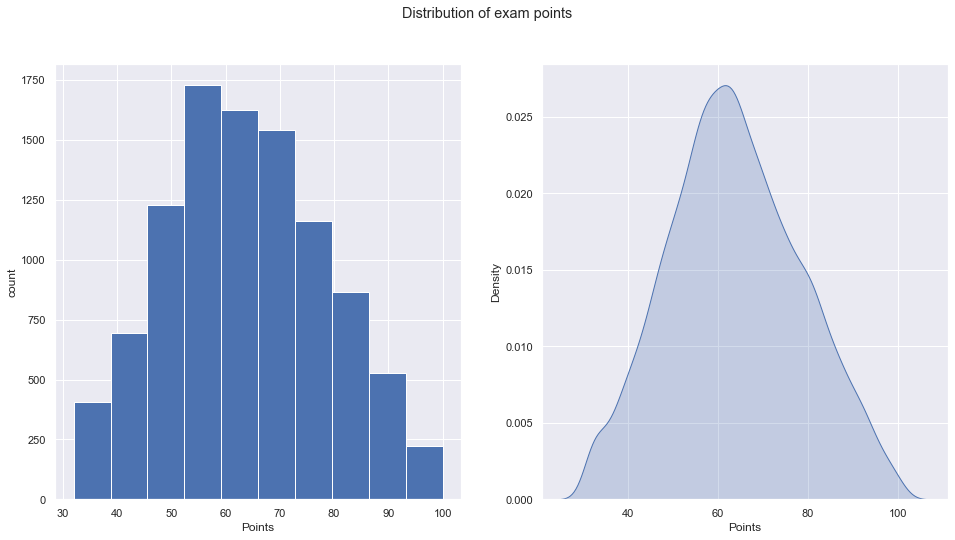

In [40]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
train['mean_exam_points'].hist()
plt.ylabel('count')
plt.xlabel('Points')

plt.subplot(122)
sns.kdeplot(train['mean_exam_points'], shade=True, legend=False)
plt.xlabel('Points')

plt.suptitle('Distribution of exam points')
plt.show()

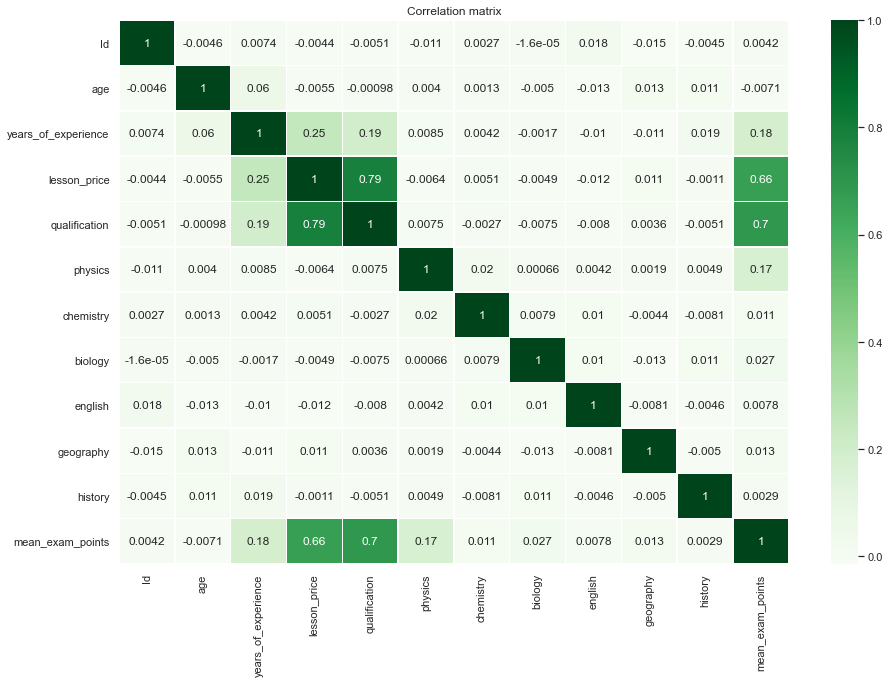

In [41]:
# тепловая карта корреляции
plt.figure(figsize = (15,10))

sns.set(font_scale=1)
sns.heatmap(train.corr(), annot=True, linewidths=.5, cmap='Greens')

plt.title('Correlation matrix')
plt.show()

In [42]:
# train_target - целевая переменная
train_target = train.mean_exam_points
id_ = train.Id # ID потом concat
train_data = train.drop(['Id','mean_exam_points'], axis = 1)

In [43]:
print(train_data.shape)
print(test.shape) # из-за ID

(10000, 10)
(10000, 11)


In [44]:
test.head(5)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [45]:
train_data.head(5)

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Построим первую модель "Градиентный спуск" Gradient Descent (GD)

### Стандартизация с добавлением intercept

In [46]:
def standart_interecept(X):
    X_ = X[['age', 'years_of_experience', 'lesson_price', 'qualification']].copy()
    means = np.mean(X_, axis = 0)
    stds = np.std(X_, axis = 0)
    display(means, stds)
    X_ = (X_-means)/stds
    X_ = pd.concat([X_, X[['physics', 'chemistry', 'biology', 'english', 'geography', 'history']]], axis=1)
    intercept = pd.DataFrame(np.ones(len(X)), columns=['intercept'])
    X_.insert(0, 'intercept', intercept)
    return X_

In [47]:
train_stand = standart_interecept(train_data)

age                      45.8780
years_of_experience       1.9868
lesson_price           1699.1050
qualification             1.7195
dtype: float64

age                      8.043526
years_of_experience      1.772125
lesson_price           524.860409
qualification            0.792225
dtype: float64

In [48]:
test_stand = standart_interecept(test)

age                      45.9728
years_of_experience       1.9800
lesson_price           1697.0950
qualification             1.7094
dtype: float64

age                      7.955882
years_of_experience      1.783199
lesson_price           524.236408
qualification            0.793443
dtype: float64

In [49]:
train_stand.head(5)

,intercept,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,1.0,-0.730774,-1.121140,-0.569875,-0.908202,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.263815,1.136037,2.192764,1.616335,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-0.855098,-1.121140,-0.950929,-0.908202,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.015167,1.700332,-0.569875,-0.908202,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,-0.357803,-0.556846,-0.379348,-0.908202,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
test_stand.head(5)

,intercept,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,1.0,0.003419,0.572006,-1.234357,-0.894078,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,-0.373661,0.572006,0.291672,0.366252,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.757578,-0.549574,-0.280589,-0.894078,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.386044,2.254375,2.294585,1.626582,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,-0.247967,1.132795,2.771469,1.626582,1.0,0.0,0.0,0.0,0.0,0.0


### MSE функция

In [51]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

### R2 score функция

In [52]:
def r2_(y, y_pred):
    r2 = 1 - (sum((y - y_pred)**2) / sum((y - np.mean(y))**2))
    return r2

In [53]:
# формула для линейной регрессии с константой
# def r2_(y, y_pred):
#     r2 = sum((y_pred -np.mean(y))**2) / sum((y - np.mean(y))**2)
#     return r2

### Линейная регрессия

Реализуем функцию, вычисляющую вектор весов по нормальному уравнению линейной регрессии, и применим ее.
$$w = (X^{T}X)^{-1}X^{T}y.$$


In [54]:
w1 = np.linalg.inv(np.dot(train_stand.T, train_stand)) @ train_stand.T @ train_target
w1

0     61.546410
1     -0.100416
2      0.306204
3      4.396900
4      6.721002
5      5.091299
6      0.286468
7      1.467959
8      0.923359
9      0.759253
10     0.450339
dtype: float64

In [55]:
print(f'Веса {w1}')
print(f'В случае использования нормального уравнения функционал ошибки составляет ', end='')
print(f'{round(calc_mse(np.squeeze(train_target),np.dot(train_stand.values, w1)), 4)}')

Веса 0     61.546410
1     -0.100416
2      0.306204
3      4.396900
4      6.721002
5      5.091299
6      0.286468
7      1.467959
8      0.923359
9      0.759253
10     0.450339
dtype: float64
В случае использования нормального уравнения функционал ошибки составляет 97.0538


### Градиентный спуск

Обучим линейную регрессию путем градиентного спуска и получим графики изменения весов, ошибки и предсказание:

In [56]:
def gradient_descent_reg_l2(X, y, iterations, eta, reg):
    W = np.zeros(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}, r2 score: {r2_(y,y_pred)}')
    return y_pred, W

In [57]:
y_pred, W = gradient_descent_reg_l2(train_stand.values, np.squeeze(train_target), iterations=10000, eta=1e-2, reg=1e-5)

Iter: 0, weights: [ 1.274746   -0.00210094  0.05429     0.19529821  0.20535624  0.502168
  0.170476    0.14215     0.068968    0.04161     0.024846  ], error 4278.6757, r2 score: -18.7874042101934
Iter: 1000, weights: [60.98848184 -0.09960832  0.30309003  4.42535062  6.69341276  5.51224585
  1.22944371  2.3930427   1.82972884  1.49064663  0.95874747], error 97.35976604163953, r2 score: 0.5497445519239089
Iter: 2000, weights: [61.41624957 -0.10079484  0.3069442   4.39709791  6.71828731  5.14340184
  0.41894545  1.63095485  1.27019872  1.1748375   0.80765815], error 97.07428850866246, r2 score: 0.551064787373851
Iter: 3000, weights: [61.4689033  -0.10092216  0.30658204  4.3975347   6.71739054  5.13054772
  0.3309779   1.51472615  1.06406861  0.99305942  0.69973141], error 97.05947613480893, r2 score: 0.5511332895107979
Iter: 4000, weights: [61.4819183  -0.10080822  0.3063941   4.39789617  6.71695219  5.12932927
  0.32129417  1.49743473  0.98912443  0.89416013  0.62573958], error 97.05668

### Сформируем y_pred для test

In [63]:
y_pred = np.dot(test_stand, W)

In [64]:
y_pred

array([50.55163769, 65.44724587, 59.13707884, ..., 51.15967705,
       64.02963659, 72.10271425])

### Создадим для проверки на Kaggle DataFrame y_pred с колонками: Id, mean_exam_points

In [60]:
# y_pred = pd.DataFrame(data=y_pred, columns=['mean_exam_points'], index=None)

In [61]:
# y_pred.insert(0, 'Id', test.Id)

In [62]:
# y_pred.to_csv('submission.csv', index=False)

# Построим вторую модель на основе алгоритма "Дерева решений"

In [3]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [4]:
class Leaf_regr:
    
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
        self.prediction = self.predict()
        
    def predict(self):
        return self.targets.mean()

In [5]:
class BaseTree:

    def __init__(self,
                 max_depth,
                 max_leaf_nodes,
                 min_leaf_samples,
                 leaf_class):
        self.max_depth = max_depth
        self.nodes = []
        self.leaves = []
        self.depth = 0
        self.max_leaves = max_leaf_nodes
        self.min_objects = min_leaf_samples
        self.tree = None
        self.Leaf = leaf_class
        
    # Разбиение датасета в узле
    def split(self,
              data,
              labels,
              column_index,
              t):

        left = np.where(data[:, column_index] <= t)
        right = np.where(data[:, column_index] > t)

        true_data = data[left]
        false_data = data[right]

        true_labels = labels[left]
        false_labels = labels[right]

        return true_data, false_data, true_labels, false_labels
    
    # Расчет прироста
    def gain(self,
             left_labels,
             right_labels,
             root):

        # доля выборки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])

        return root - p * self.criterion(left_labels) - (1 - p) * self.criterion(right_labels)   
    
    # Нахождение наилучшего разбиения
    def find_best_split(self,
                        data,
                        labels):

        #  обозначим минимальное количество объектов в узле
        min_samples_leaf = 5

        root = self.criterion(labels)

        best_gain = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]

        for index in range(n_features):
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique(data[:, index])

            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < min_samples_leaf or len(false_data) < min_samples_leaf:
                    continue

                current_gain = self.gain(true_labels, false_labels, root)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_gain > best_gain:
                    best_gain, best_t, best_index = current_gain, t, index

        return best_gain, best_t, best_index
    
    # Построение дерева с помощью рекурсивной функции
    def build_tree(self,
                   data,
                   labels):

        gain, t, index = self.find_best_split(data, labels)
        
        # ИЗМЕНЕНИЯ: здесь добавила базовые случаи для остановки построения дерева
 
        #  Базовый случай 2 - прекращаем рекурсию, когда достигли максимальной глубины дерева
        if self.depth > self.max_depth:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)
        
        #  Базовый случай 3 - прекращаем рекурсию, когда достигли максимального количества листьев
        if len(self.leaves) >= self.max_leaves - 1 or self.depth >= self.max_leaves - 1:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)
        
        #  Базовый случай 4 - прекращаем рекурсию, когда достигли минимального количества объектов в листе
        if len(data) <= self.min_objects:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)
        
         #  Базовый случай 1 - прекращаем рекурсию, когда нет прироста в качества
        if gain == 0:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)

        self.depth += 1
        
        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

        # Рекурсивно строим два поддерева
        true_branch = self.build_tree(true_data, true_labels)
        false_branch = self.build_tree(false_data, false_labels)

        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        self.nodes.append(Node(index, t, true_branch, false_branch))
        return Node(index, t, true_branch, false_branch)
    
    def predict_object(self,
                       obj,
                       node):

        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, self.Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.predict_object(obj, node.true_branch)
        else:
            return self.predict_object(obj, node.false_branch)
    
    def fit(self, data, labels):
        self.tree = self.build_tree(data, labels)
        return self
    
    def predict(self, data):
    
        classes = []
        for obj in data:
            prediction = self.predict_object(obj, self.tree)
            classes.append(prediction)
        return classes

In [6]:
class Regression_Tree(BaseTree):
    def __init__(self,
                 max_depth=np.inf,
                 max_leaf_nodes=np.inf,
                 min_leaf_samples=1,
                 leaf_class=Leaf_regr):
        super().__init__(max_depth=max_depth,
                         max_leaf_nodes=max_leaf_nodes,
                         min_leaf_samples=min_leaf_samples,
                         leaf_class=Leaf_regr)

    # Расчет дисперсии
    def criterion(self, targets):
        return np.mean((targets - targets.mean())**2)

In [19]:
regr = Regression_Tree(max_depth=5)
regr.fit(train_data.values, train_target.values)

print(f'r2 score on train dataset -> {r2_(train_target.values, regr.predict(train_data.values))}')

r2 score on train dataset -> 0.534034745152534


In [23]:
test_data = test.drop('Id', axis=1)
test_data

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,42.0,0.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,51.0,2.0,2200.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
9997,33.0,5.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,48.0,0.0,1750.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


### Сформируем y_pred_2 для test

In [65]:
y_pred_2 = regr.predict(test_data.values)

### Создадим для проверки на Kaggle DataFrame y_pred с колонками: Id, mean_exam_points

In [30]:
y_pred_2 = pd.DataFrame(data=y_pred_2, columns=['mean_exam_points'], index=None)

In [31]:
y_pred_2.insert(0, 'Id', test.Id)

In [32]:
y_pred_2.to_csv('submissionTree.csv', index=False)

In [35]:
y_pred_2

,Id,mean_exam_points
0,10000,54.311853
1,10001,61.515179
2,10002,48.941980
3,10003,78.955931
4,10004,78.955931
...,...,...
9995,19995,48.941980
9996,19996,78.955931
9997,19997,54.311853
9998,19998,61.515179


### В целях научного эксперимента возьмем среднее от двух моделей

In [90]:
y_pred_3 = (y_pred+y_pred_2) / 2

In [91]:
y_pred_3 = pd.DataFrame(data=y_pred_3, columns=['mean_exam_points'], index=None)

In [92]:
y_pred_3.insert(0, 'Id', test.Id)

In [93]:
y_pred_3.to_csv('submissionMean.csv', index=False)

In [94]:
y_pred_3

,Id,mean_exam_points
0,10000,52.431745
1,10001,63.481213
2,10002,54.039529
3,10003,84.319860
4,10004,84.531736
...,...,...
9995,19995,51.242464
9996,19996,77.925529
9997,19997,52.735765
9998,19998,62.772408


# Вывод: лучший результат показало среднее от двух моделей 0.90951. Первая модель, на Leaderboard резульат 0.86035. Вторая модель показала результат 0.83321.